In [1]:
import pandas as pd
df = pd.read_csv('/home/shabi/Desktop/Project/news_article/Newspaper-Article-Classification-master/data/train.csv')
df
print("df.shape = ", df.shape)
df.head()

df.shape =  (120000, 3)


,group,title,article
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [2]:
import pandas as pd
df = pd.read_csv('/home/shabi/Desktop/Project/news_article/Newspaper-Article-Classification-master/data/train.csv')
categories = df.groupby('group')
print("Total Categories : ", categories.ngroups)
print(categories.size())

Total Categories :  4
group
1    30000
2    30000
3    30000
4    30000
dtype: int64


<Figure size 1440x360 with 0 Axes>

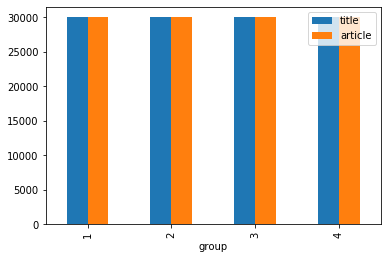

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
df.groupby('group').count().plot.bar(ylim=0)
plt.show()

Importing the 20NewsGroups dataset consisting of 11314 articles in the training dataset and 7532  articles in the test dataset accross 20 classes.

In [5]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

Next we Vectorize the articles in the Corpus.
For this we use sci-kit learn's CountVectorizer to create a sparse matrix of the count of each word in an article
For better results we then calculate the inverse term frequency for the words using sci-kit learn's TfidfTransformer

In [6]:
print(train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
import time
from sklearn.feature_extraction.text import CountVectorizer
t1=time.time()
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.data)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print ("Time take to vectorize the training data:", round(time.time()-t1, 3), "secs")
print("Sample sparse matrix after vectorization:")
print (X_train_tfidf[0:4,0:20000])


Time take to vectorize the training data: 2.516 secs
Sample sparse matrix after vectorization:
  (0, 18299)	0.138749083899155
  (0, 16574)	0.14155752531572685
  (0, 4605)	0.06332603952480323
  (1, 7797)	0.13724375024886207
  (1, 2927)	0.05212944077716301
  (2, 15032)	0.07834044496813064
  (2, 12197)	0.05168179280403426
  (2, 6449)	0.06812813848609162
  (2, 6028)	0.10554465088856507
  (2, 5811)	0.2878251559842457
  (2, 5023)	0.13698619641739626
  (2, 3412)	0.06228731252083091
  (3, 18618)	0.14195950717692904
  (3, 4155)	0.05353413616615428


Having got the sparse matrix, we would now apply classification Algorithms on this vectorized word matrix to predic classes for data in test dataset.
Starting with K-Nearest Neighbours


In [8]:
from sklearn.pipeline import Pipeline
from sklearn import neighbors

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', neighbors.KNeighborsClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print("Accuracy:")
np.mean(predicted == test.target)

Time take to Vectorize training data and train model: 2.258 secs
Time take to Predict classes for testing data: 8.412 secs
Accuracy:


0.6591874668082847

Now we apply Support Vector Machine algorithm


In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print("Accuracy:")
np.mean(predicted == test.target)

Time take to Vectorize training data and train model: 3.107 secs
Time take to Predict classes for testing data: 1.339 secs
Accuracy:


0.8534253850238981

Now we apply Naive Bayes

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print("Accuracy:")
np.mean(predicted == test.target)


Time take to Vectorize training data and train model: 2.391 secs
Time take to Predict classes for testing data: 1.342 secs
Accuracy:


0.7738980350504514

All this while we used Bag-Of-Words technique to vectorize the dataset.
Here we apply ngrams technique to create the sparse matrix. Let's have an example as how n-grams is differnt from Bag-of-Words and what it actually does.

In [11]:
ngram_vectorizer = CountVectorizer()
counts = ngram_vectorizer.fit_transform(['Anagh Anagh is intelligent', 'Anmol is smart'])
print("Bag-of-Words")
print(ngram_vectorizer.get_feature_names())
print(counts.toarray().astype(int))

ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['Anagh', 'Anmol'])
print("Bi-grams")
print(ngram_vectorizer.get_feature_names())
print(counts.toarray().astype(int))

ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))
counts = ngram_vectorizer.fit_transform(['Anagh', 'Anmol'])
print("Tri-grams")
print(ngram_vectorizer.get_feature_names())
print(counts.toarray().astype(int))


Bag-of-Words
['anagh', 'anmol', 'intelligent', 'is', 'smart']
[[2 0 1 1 0]
 [0 1 0 1 1]]
Bi-grams
[' a', 'ag', 'an', 'gh', 'h ', 'l ', 'mo', 'na', 'nm', 'ol']
[[1 1 1 1 1 0 0 1 0 0]
 [1 0 1 0 0 1 1 0 1 1]]
Tri-grams
[' an', 'agh', 'ana', 'anm', 'gh ', 'mol', 'nag', 'nmo', 'ol ']
[[1 1 1 0 1 0 1 0 0]
 [1 0 0 1 0 1 0 1 1]]


What if we need to apply Bag-of-2grams, or in other words club two consecutive words in a document, then vectorize

In [12]:
ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['Today it is Allahabad', 'Tomorrow it will be Prayagraj'])
print("Bag-of-2grams")
print(ngram_vectorizer.get_feature_names())
print(counts.toarray().astype(int))
t1=time.time()
count_vect = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
X_train_counts = count_vect.fit_transform(train.data)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print ("Time take to vectorize the training data:", round(time.time()-t1, 3), "secs")

Bag-of-2grams
['be prayagraj', 'is allahabad', 'it is', 'it will', 'today it', 'tomorrow it', 'will be']
[[0 1 1 0 1 0 0]
 [1 0 0 1 0 1 1]]
Time take to vectorize the training data: 10.736 secs


Now we will apply n-grams on our dataset and will then apply SVM classification algorithm. We will compare the accuracies for uni-gram, bi-gram and tri-gram vectorization on character level.

In [13]:
print("FOR CHARACTER LEVEL n-GRAMS")
print("-------------------")
print("UNI-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(1, 1))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")
print("BI-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))

print("--------------------")
print("TRI-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(3, 3))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")
print("4-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(4, 4))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")
print("5-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Vectorize training data and train model:", round(time.time()-t1, 3), "secs")
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")
print("6-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(6, 6))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))

FOR CHARACTER LEVEL n-GRAMS
-------------------
UNI-GRAMS
Time take to Vectorize training data and train model: 7.145 secs
Accuracy :  0.1421933085501859
--------------------
BI-GRAMS
Time take to Vectorize training data and train model: 9.701 secs
Accuracy :  0.6618428040361126
--------------------
TRI-GRAMS
Time take to Vectorize training data and train model: 11.936 secs
Accuracy :  0.8151885289431758
--------------------
4-GRAMS
Time take to Vectorize training data and train model: 14.962 secs
Accuracy :  0.8429368029739777
--------------------
5-GRAMS
Time take to Vectorize training data and train model: 16.344 secs
Time take to Vectorize training data and train model: 5.424 secs
Accuracy :  0.8422729686670207
--------------------
6-GRAMS
Time take to Vectorize training data and train model: 16.959 secs
Accuracy :  0.8381571959638874


Now we apply N-Grams with Naive Bayes Classifier

In [14]:
from sklearn.pipeline import Pipeline
from sklearn import neighbors
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()
predicted = text_clf.predict(test.data)
print ("Time take to Predict classes for Test data:", round(time.time()-t1, 3), "secs")
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")


Time take to Vectorize training data and train model: 11.375 secs
Time take to Predict classes for Test data: 5.401 secs
Accuracy :  0.7015400955921403
--------------------


Now we apply N-Grams with KNN classifier

In [20]:
text_clf = Pipeline([('vect', CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', neighbors.KNeighborsClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
t1=time.time()

predicted = text_clf.predict(test.data)
print ("Time take to predict classes for Test data:", round(time.time()-t1, 3), "secs")
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")

Time take to Vectorize training data and train model: 18.763 secs
Time take to predict classes for Test data: 37.134 secs
Accuracy :  0.5728890069038768
--------------------


Now applying Bag-of-1gram(Same as bag of words), Bag-of-2grams and Bag-of-3grams to our dataset this time grouping words together instead of characters

In [17]:
print("WORD LEVEL n-GRAMS")
print("--------------------")
print("UNI-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='word', ngram_range=(1, 1))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")
print("BI-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='word', ngram_range=(2, 2))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))
print("--------------------")
print("TRI-GRAMS")
text_clf = Pipeline([('vect', CountVectorizer(analyzer='word', ngram_range=(3, 3))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier())])
t0=time.time()
text_clf.fit(train.data, train.target)
print ("Time take to Vectorize training data and train model:", round(time.time()-t0, 3), "secs")
predicted = text_clf.predict(test.data)
print("Accuracy : ",np.mean(predicted == test.target))

WORD LEVEL n-GRAMS
--------------------
UNI-GRAMS
Time take to Vectorize training data and train model: 3.274 secs
Accuracy :  0.8524960169941582
--------------------
BI-GRAMS
Time take to Vectorize training data and train model: 10.697 secs
Accuracy :  0.8028412108337759
--------------------
TRI-GRAMS
Time take to Vectorize training data and train model: 16.093 secs
Accuracy :  0.716542750929368


Now we apply Word level CNN on the same dataset and calculate accuracy

In [18]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
np.random.seed(1237)
import time

from sklearn.datasets import fetch_20newsgroups
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

label_index = train.target
label_names = train.target_names
labelled_files = train.filenames
 
data_tags = ["filename","category","news"]
data_list = []
 
# Read and add data from file to a list
i=0
for f in labelled_files:
    data_list.append((f,label_names[label_index[i]],train.data[i]))
    i += 1
    
train_data = pd.DataFrame.from_records(data_list, columns=data_tags)

label_index = test.target
label_names = test.target_names
labelled_files = test.filenames
data_list = []
 
# Read and add data from file to a list
i=0
for f in labelled_files:
    data_list.append((f,label_names[label_index[i]],test.data[i]))
    i += 1
    
test_data = pd.DataFrame.from_records(data_list, columns=data_tags)

train_posts = train_data['news'][:]
train_tags = train_data['category'][:]
train_files_names = train_data['filename'][:]
 
test_posts = test_data['news'][:]
test_tags = test_data['category'][:]
test_files_names = test_data['filename'][:]

# 20 news groups
num_labels = 20
vocab_size = 50000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)
 
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
 

	
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.333))
model.add(Dense(512))
model.add(Activation('relu'))


model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)
t1=time.time()
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print('Test accuracy:', score[1])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               25600512  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)               

Now we apply CNN on data pre processed with N-Grams, taking value of N as 2.

In [19]:
import pandas as pd
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
np.random.seed(1237)
import time
from sklearn.datasets import fetch_20newsgroups
train = fetch_20newsgroups(subset='train', shuffle=True)
test = fetch_20newsgroups(subset='test', shuffle=True)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word', ngram_range=(2, 2), max_features=30000)
X_train_counts = count_vect.fit_transform(train.data)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

count_vect = CountVectorizer(analyzer='word', ngram_range=(2, 2), max_features=30000)
X_train_counts = count_vect.fit_transform(test.data)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_train_counts)

label_index = train.target
label_names = train.target_names
labelled_files = train.filenames
 
data_tags = ["filename","category","news"]
data_list = []
 
# Read and add data from file to a list
i=0
for f in labelled_files:
    data_list.append((f,label_names[label_index[i]],train.data[i]))
    i += 1
    
train_data = pd.DataFrame.from_records(data_list, columns=data_tags)

label_index = test.target
label_names = test.target_names
labelled_files = test.filenames
data_list = []
 
# Read and add data from file to a list
i=0
for f in labelled_files:
    data_list.append((f,label_names[label_index[i]],test.data[i]))
    i += 1
    
test_data = pd.DataFrame.from_records(data_list, columns=data_tags)

train_posts = train_data['news'][:]
train_tags = train_data['category'][:]
train_files_names = train_data['filename'][:]
 
test_posts = test_data['news'][:]
test_tags = test_data['category'][:]
test_files_names = test_data['filename'][:]

# 20 news groups
num_labels = 20
vocab_size = 50000
batch_size = 100
 
# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)
 
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
 

	
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

model = Sequential()
model.add(Dense(512, input_shape=(30000,)))
model.add(Activation('relu'))
model.add(Dropout(0.333))
model.add(Dense(512))
model.add(Activation('relu'))


model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(X_train_tfidf.todense(), y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)
t1=time.time()
score = model.evaluate(X_test_tfidf, y_test,
                       batch_size=batch_size, verbose=1)
print ("Time take to Predict classes for testing data:", round(time.time()-t1, 3), "secs")
print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               15360512  
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)               